# Exploratory Data Analysis

In [1]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

| Field Name              | Data Type       | Description                                                                                   |
|-------------------------|-----------------|-----------------------------------------------------------------------------------------------|
| accounting_date         | Date            | The date when the financial transaction is recorded in the accounting system.                |
| fiscal_year             | Integer         | The year in which the transaction occurs, based on the company's fiscal calendar.            |
| fiscal_month            | Integer         | The month of the fiscal year during which the transaction takes place.                       |
| calendar_year           | Integer         | The year in which the transaction occurs, based on the standard calendar.                    |
| calendar_month          | Integer         | The month of the year during which the transaction takes place, based on the standard calendar. |
| calendar_day            | Integer         | The specific day of the month on which the transaction occurs.                               |
| company_code            | String          | A unique identifier for the company conducting the transaction.                              |
| customer_code           | String          | A unique identifier for the customer involved in the transaction.                            |
| customer_district_code  | String          | A code representing the geographical district of the customer.                               |
| item_code               | String          | A unique identifier for the item being sold.                                                 |
| business_area_code      | String          | A code representing the specific area of business related to the transaction.                |
| item_group_code         | String          | A code indicating the group to which the item belongs.                                       |
| item_class_code         | String          | A code categorizing the item based on its characteristics or type.                           |
| item_type               | String          | A descriptor indicating the nature or category of the item.                                  |
| bonus_group_code        | String          | A code identifying the group related to bonuses or incentives for sales.                     |
| environment_group_code  | String          | A code denoting the environmental category related to the product.                           |
| technology_group_code   | String          | A code representing the technology category associated with the item or service.             |
| commission_group_code   | String          | A code identifying the group that determines commission structures for sales.                |
| reporting_classification| String          | A classification used for reporting purposes, indicating how the transaction should be categorized. |
| light_source            | String          | A code indicating the source of lighting related to the item, if applicable.                 |
| warehouse_code          | String          | A code identifying the warehouse where the item is stored or shipped from.                   |
| abc_class_code          | String          | A classification code used in inventory management to indicate the importance of an item (e.g., A, B, C categories). |
| abc_class_volume        | Float           | The volume of goods associated with the ABC classification.                                  |
| business_chain_l1_code  | String          | A code representing the first level of the business chain for tracking and analysis.          |
| business_chain_l1_name  | String          | The name corresponding to the business chain level 1 code.                                   |
| contact_method_code     | String          | A code indicating the contact used.                                                          |
| salesperson_code        | String          | A unique identifier for the salesperson associated with the transaction.                     |
| order_type_code         | String          | A code that categorizes the type of order.                                                   |
| market_segment          | String          | A descriptor of the specific market segment targeted by the transaction.                     |
| value_sales             | Float           | The monetary value of sales generated from the transaction.                                  |
| value_cost              | Float           | The cost associated with the transaction.                                                    |
| value_quantity          | Integer         | The quantity of items sold or transacted.                                                    |
| value_price_adjustment  | Float           | Any adjustments made to the price during the transaction (discounts, surcharges, etc.).      |
| currency                | String          | The currency in which the transaction is conducted.                                          |
| item_source_class       | String          | A classification indicating the source or origin of the item.                                |
| invoice_number          | String          | A unique identifier for the invoice related to the transaction.                              |
| line_number             | Integer         | The line item number on the invoice, indicating specific items.                              |
| invoice_date            | Date            | The date the invoice is issued.                                                              |
| customer_order_number   | String          | A unique identifier for the customer's order.                                                |
| order_date              | Date            | The date when the order was placed.                                                          |
| dss_update_time         | Timestamp       | The timestamp indicating when the data was last updated in the system.                       |



## 1. Understanding Data Structure:

- Examine data types, column names, and dataset size.
- Check how the data is organized—categorical vs. numerical features, distribution, and relationships.

In [2]:
df_2012 = pd.read_csv("../data/raw/2012_Data.csv", encoding='unicode_escape', low_memory=False)
df_2013 = pd.read_csv("../data/raw/2013_Data.csv", encoding='unicode_escape', low_memory=False)

In [3]:
#show data shape
print(f"2012 data \nrows: {df_2012.shape[0]:,} | columns: {df_2012.shape[1]}")
print(f"2013 data \nrows: {df_2013.shape[0]:,} | columns: {df_2013.shape[1]}")
#show first five rows
df_2012.head()


2012 data 
rows: 1,037,205 | columns: 41
2013 data 
rows: 951,177 | columns: 41


,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20120509,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84.0,0,AUD,NaN,2217887,1,20120509,2865354,20120509,49:58.7
1,20120216,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12.0,0,AUD,NaN,2185745,1,20120216,2833515,20120216,49:58.7
2,20120509,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,12.0,0,AUD,NaN,2217807,1,20120509,2864857,20120508,49:58.7
3,20120518,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,6.0,0,AUD,NaN,2222758,1,20120518,2869759,20120518,49:58.7
4,20120109,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,6.0,0,AUD,NaN,2170374,1,20120109,2819189,20120109,49:58.7


In [4]:
# count object variables
num_obj = df_2012.select_dtypes('object').shape
print(f"count object column = {num_obj[1]}")
#count numerical variables
num_numerical = df_2012.select_dtypes(exclude='object').shape
print(f"count numerical column = {num_numerical[1]}")


count object column = 22
count numerical column = 19


In [5]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037205 entries, 0 to 1037204
Data columns (total 41 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   accounting_date           1037205 non-null  int64  
 1   fiscal_year               1037205 non-null  int64  
 2   fiscal_month              1037205 non-null  int64  
 3   calendar_year             1037205 non-null  int64  
 4   calendar_month            1037205 non-null  int64  
 5   calendar_day              1037205 non-null  int64  
 6   company_code              1037205 non-null  int64  
 7   customer_code             1037205 non-null  object 
 8   customer_district_code    1037205 non-null  int64  
 9   item_code                 1037205 non-null  object 
 10  business_area_code        1037205 non-null  object 
 11  item_group_code           1037205 non-null  object 
 12  item_class_code           1037205 non-null  object 
 13  item_type                 1

In [6]:
#combine 2012 and 2013 data
df = pd.concat([df_2012, df_2013], axis=0)
print(f"2012 and 2013 data \nrows: {df.shape[0]:,} | columns: {df.shape[1]}")
df.head()

2012 and 2013 data 
rows: 1,988,382 | columns: 41


,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,item_source_class,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time
0,20120509,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84.0,0,AUD,NaN,2217887,1,20120509,2865354,20120509,49:58.7
1,20120216,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12.0,0,AUD,NaN,2185745,1,20120216,2833515,20120216,49:58.7
2,20120509,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,12.0,0,AUD,NaN,2217807,1,20120509,2864857,20120508,49:58.7
3,20120518,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,6.0,0,AUD,NaN,2222758,1,20120518,2869759,20120518,49:58.7
4,20120109,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,6.0,0,AUD,NaN,2170374,1,20120109,2819189,20120109,49:58.7


In [7]:
df.describe().round(2)

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_district_code,item_type,value_sales,value_cost,value_quantity,value_price_adjustment,item_source_class,invoice_number,line_number,invoice_date,order_date
count,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,1988382.00,0.0,1988382.00,1988382.00,1988382.00,1988382.00
mean,20125439.03,2012.97,6.52,2012.48,6.40,15.46,230.01,381.77,5.84,409.85,263.81,27.18,0.02,NaN,1260426.04,0.36,20125439.03,20125347.39
std,5011.22,0.71,3.62,0.50,3.25,8.68,184.31,152.75,1.89,2935.18,2050.51,329.47,0.15,NaN,1355150.11,1.72,5011.22,5107.65
min,20120102.00,2012.00,1.00,2012.00,1.00,1.00,100.00,100.00,1.00,-793541.98,-141469.52,-45000.00,0.00,NaN,0.00,-92.00,20120102.00,20090326.00
25%,20120619.00,2012.00,3.00,2012.00,4.00,8.00,205.00,300.00,5.00,23.00,9.38,2.00,0.00,NaN,656432.00,0.00,20120619.00,20120615.00
50%,20121206.00,2013.00,7.00,2012.00,6.00,15.00,205.00,400.00,7.00,67.50,31.07,6.00,0.00,NaN,749627.00,0.00,20121206.00,20121204.00
75%,20130620.00,2013.00,10.00,2013.00,9.00,23.00,205.00,500.00,7.00,197.70,101.91,20.00,0.00,NaN,2214221.75,1.00,20130620.00,20130618.00
max,20131231.00,2014.00,12.00,2013.00,12.00,31.00,950.00,720.00,9.00,793541.98,777669.20,105000.00,1.00,NaN,7003023.00,49.00,20131231.00,20131230.00


In [8]:
# fix data type of 'Date' column
df['accounting_date'] = pd.to_datetime(df['accounting_date'], format='%Y%m%d')

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%Y%m%d')

df['order_date'] = pd.to_datetime(df['order_date'], format='%Y%m%d')

df['fiscal_date'] = pd.to_datetime(df['fiscal_year'].astype(str) + '-' + df['fiscal_month'].astype(str) + '-01', format='%Y-%m-%d')

df['calendar_date'] = pd.to_datetime(df['calendar_year'].astype(str) + '-' + df['calendar_month'].astype(str) + '-' + df['calendar_day'].astype(str), format='%Y-%m-%d')

#drop month and year columns
df.drop(['fiscal_year', 'fiscal_month', 'calendar_year', 'calendar_month', 'calendar_day'], axis=1, inplace=True)


Fix date column data type by convert it to datetime datatyoe

In [9]:
df[['accounting_date', 'invoice_date', 'order_date', 'fiscal_date', 'calendar_date']].head()

,accounting_date,invoice_date,order_date,fiscal_date,calendar_date
0,2012-05-09,2012-05-09,2012-05-09,2012-11-01,2012-05-09
1,2012-02-16,2012-02-16,2012-02-16,2012-08-01,2012-02-16
2,2012-05-09,2012-05-09,2012-05-08,2012-11-01,2012-05-09
3,2012-05-18,2012-05-18,2012-05-18,2012-11-01,2012-05-18
4,2012-01-09,2012-01-09,2012-01-09,2012-07-01,2012-01-09


preview tre dataset date

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988382 entries, 0 to 951176
Data columns (total 38 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   company_code              int64         
 2   customer_code             object        
 3   customer_district_code    int64         
 4   item_code                 object        
 5   business_area_code        object        
 6   item_group_code           object        
 7   item_class_code           object        
 8   item_type                 int64         
 9   bonus_group_code          object        
 10  environment_group_code    object        
 11  technology_group_code     object        
 12  commission_group_code     object        
 13  reporting_classification  object        
 14  light_source              object        
 15  warehouse_code            object        
 16  abc_class_code            object        
 17  abc_class_volu

In [11]:
#fix data type for numerical columns to object
df['company_code'] = df['company_code'].astype(str)

df['customer_district_code'] = df['customer_district_code'].astype(str)


df['invoice_number'] = df['invoice_number'].astype(str)

df['item_type'] = df['item_type'].astype(str)


some column are number but it is category, so I convert it to string data type

In [12]:
df.select_dtypes('object').head()

,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,environment_group_code,...,business_chain_l1_code,business_chain_l1_name,contact_method_code,salesperson_code,order_type_code,market_segment,currency,invoice_number,customer_order_number,dss_update_time
0,101,411800601,410,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,S,...,ELC,ElectraCorp Ltd,NA,T612,NOR,Commercial & Industrial,AUD,2217887,2865354,49:58.7
1,101,361000403,300,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,S,...,BPS,BrightPower Solutions,NA,P345,NOR,Commercial & Industrial,AUD,2185745,2833515,49:58.7
2,101,361000403,300,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,S,...,BPS,BrightPower Solutions,NA,P345,NOR,Commercial & Industrial,AUD,2217807,2864857,49:58.7
3,101,565540415,500,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,S,...,GEW,Global Electric Wholesalers,NA,T504,EDI,Commercial & Industrial,AUD,2222758,2869759,49:58.7
4,101,565540415,500,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,S,...,GEW,Global Electric Wholesalers,NA,T504,EDI,Commercial & Industrial,AUD,2170374,2819189,49:58.7


In [13]:
#show numerical columns
df.select_dtypes(exclude=['object', 'datetime']).head()

,value_sales,value_cost,value_quantity,value_price_adjustment,item_source_class,line_number
0,218.40,178.1976,84.0,0,NaN,1
1,38.28,25.4568,12.0,0,NaN,1
2,40.20,25.4568,12.0,0,NaN,1
3,20.10,12.7284,6.0,0,NaN,1
4,19.14,12.7284,6.0,0,NaN,1


In [14]:
#show count of each data type
print(df.shape)
df.dtypes.value_counts()

(1988382, 38)


object            27
datetime64[ns]     5
float64            4
int64              2
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1988382 entries, 0 to 951176
Data columns (total 38 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   accounting_date           datetime64[ns]
 1   company_code              object        
 2   customer_code             object        
 3   customer_district_code    object        
 4   item_code                 object        
 5   business_area_code        object        
 6   item_group_code           object        
 7   item_class_code           object        
 8   item_type                 object        
 9   bonus_group_code          object        
 10  environment_group_code    object        
 11  technology_group_code     object        
 12  commission_group_code     object        
 13  reporting_classification  object        
 14  light_source              object        
 15  warehouse_code            object        
 16  abc_class_code            object        
 17  abc_class_volu

In [16]:
df.describe().round(2)

,accounting_date,value_sales,value_cost,value_quantity,value_price_adjustment,item_source_class,line_number,invoice_date,order_date,fiscal_date,calendar_date
count,1988382,1988382.00,1988382.00,1988382.00,1988382.00,0.0,1988382.00,1988382,1988382,1988382,1988382
mean,2012-12-19 08:25:48.122643712,409.85,263.81,27.18,0.02,NaN,0.36,2012-12-19 08:25:48.122643712,2012-12-15 16:19:19.266981120,2013-06-05 14:16:01.015337984,2012-12-19 08:25:48.122643712
min,2012-01-02 00:00:00,-793541.98,-141469.52,-45000.00,0.00,NaN,-92.00,2012-01-02 00:00:00,2009-03-26 00:00:00,2012-07-01 00:00:00,2012-01-02 00:00:00
25%,2012-06-19 00:00:00,23.00,9.38,2.00,0.00,NaN,0.00,2012-06-19 00:00:00,2012-06-15 00:00:00,2012-12-01 00:00:00,2012-06-19 00:00:00
50%,2012-12-06 00:00:00,67.50,31.07,6.00,0.00,NaN,0.00,2012-12-06 00:00:00,2012-12-04 00:00:00,2013-06-01 00:00:00,2012-12-06 00:00:00
75%,2013-06-20 00:00:00,197.70,101.91,20.00,0.00,NaN,1.00,2013-06-20 00:00:00,2013-06-18 00:00:00,2013-12-01 00:00:00,2013-06-20 00:00:00
max,2013-12-31 00:00:00,793541.98,777669.20,105000.00,1.00,NaN,49.00,2013-12-31 00:00:00,2013-12-30 00:00:00,2014-06-01 00:00:00,2013-12-31 00:00:00
std,NaN,2935.18,2050.51,329.47,0.15,NaN,1.72,NaN,NaN,NaN,NaN


In [17]:
# Loop through each column and print the unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("\n")

Unique values for column 'accounting_date':
<DatetimeArray>
['2012-05-09 00:00:00', '2012-02-16 00:00:00', '2012-05-18 00:00:00',
 '2012-01-09 00:00:00', '2012-05-04 00:00:00', '2012-06-26 00:00:00',
 '2012-06-05 00:00:00', '2012-06-22 00:00:00', '2012-04-03 00:00:00',
 '2012-04-18 00:00:00',
 ...
 '2013-12-31 00:00:00', '2013-12-24 00:00:00', '2013-12-27 00:00:00',
 '2013-12-23 00:00:00', '2013-12-30 00:00:00', '2013-12-22 00:00:00',
 '2013-11-23 00:00:00', '2013-11-16 00:00:00', '2013-07-27 00:00:00',
 '2013-08-31 00:00:00']
Length: 543, dtype: datetime64[ns]


Unique values for column 'company_code':
['101' '100' '140' '205' '170' '220' '950' '240' '510' '120']


Unique values for column 'customer_code':
['411800601' '361000403' '565540415' ... 'ZI2000017 ' 'Z85020601 '
 '434790100']


Unique values for column 'customer_district_code':
['410' '300' '500' '310' '400' '200' '210' '720' '710' '600' '510' '530'
 '535' '540' '520' '545' '100']


Unique values for column 'item_code':
['GE

In [18]:
for column in df.select_dtypes('object').columns:
    df[column] = df[column].str.lstrip()
    df[column] = df[column].str.rstrip()

## 2. Handling Missing Values:

- Determine the presence and extent of missing values.
- Visualize or summarize missing data to understand patterns.
- Decide on strategies to handle missing data (e.g., imputation, removal).

Data shape: (1988382, 38)
Percentage of df missing from each column


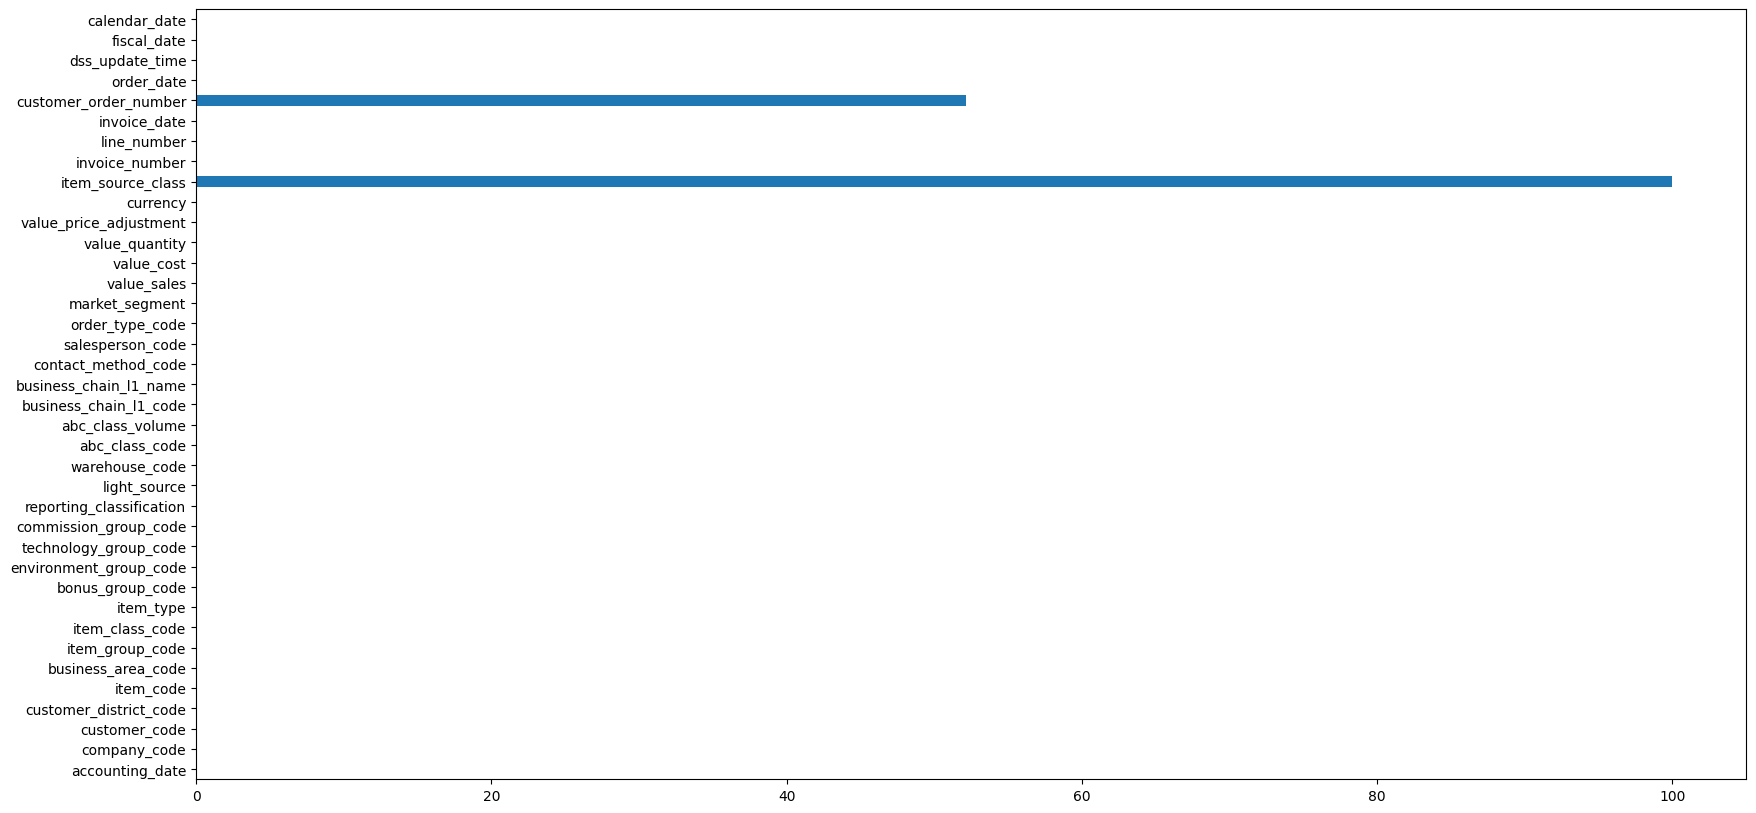

In [19]:
#show missing values
print("Data shape:", df.shape)
print("Percentage of df missing from each column")
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='barh', figsize=(20,10))
plt.show()

In [20]:
df['item_source_class'].value_counts(dropna=False)

item_source_class
NaN    1988382
Name: count, dtype: int64

In [21]:
#drop columns with high missing values
df.drop(['item_source_class'], axis=1, inplace=True)

## 3. Identifying Outliers:

- Outliers can be identified through visualizations (e.g., boxplots) or statistical methods.
- Outliers may be errors or valuable indicators, and understanding them is critical for further analysis.

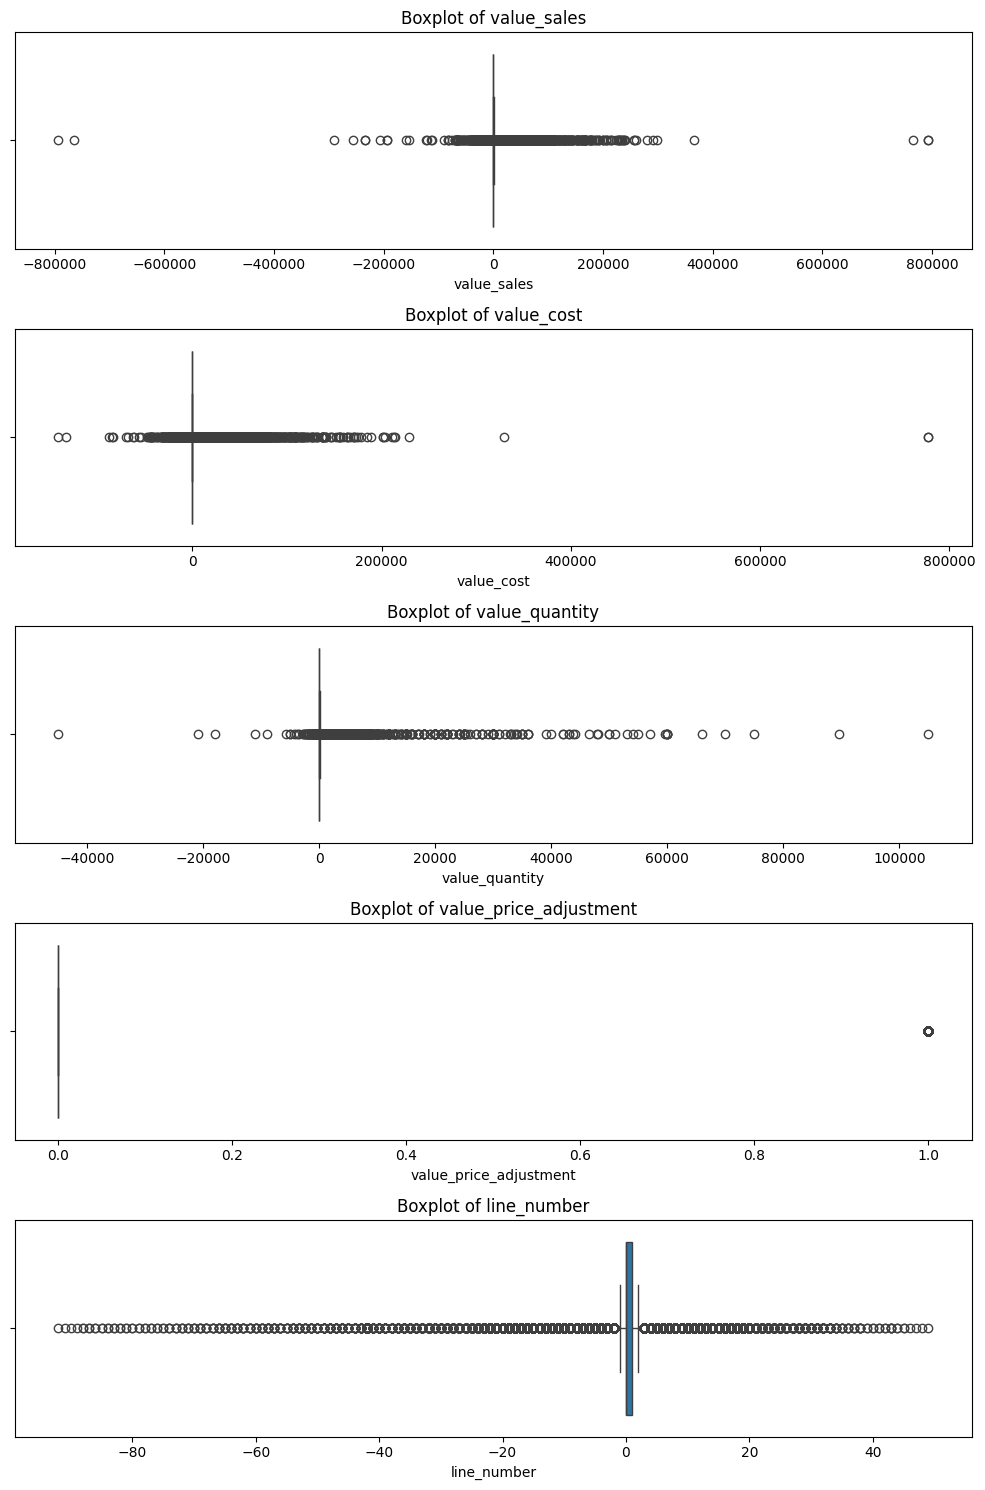

In [22]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(df.select_dtypes(exclude=['object', 'datetime']).columns), ncols=1, figsize=(10, 3 * len(df.select_dtypes(exclude=['object', 'datetime']).columns)))

# Loop through each numerical column and create a boxplot
for ax, col in zip(axes, df.select_dtypes(exclude=['object', 'datetime']).columns):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

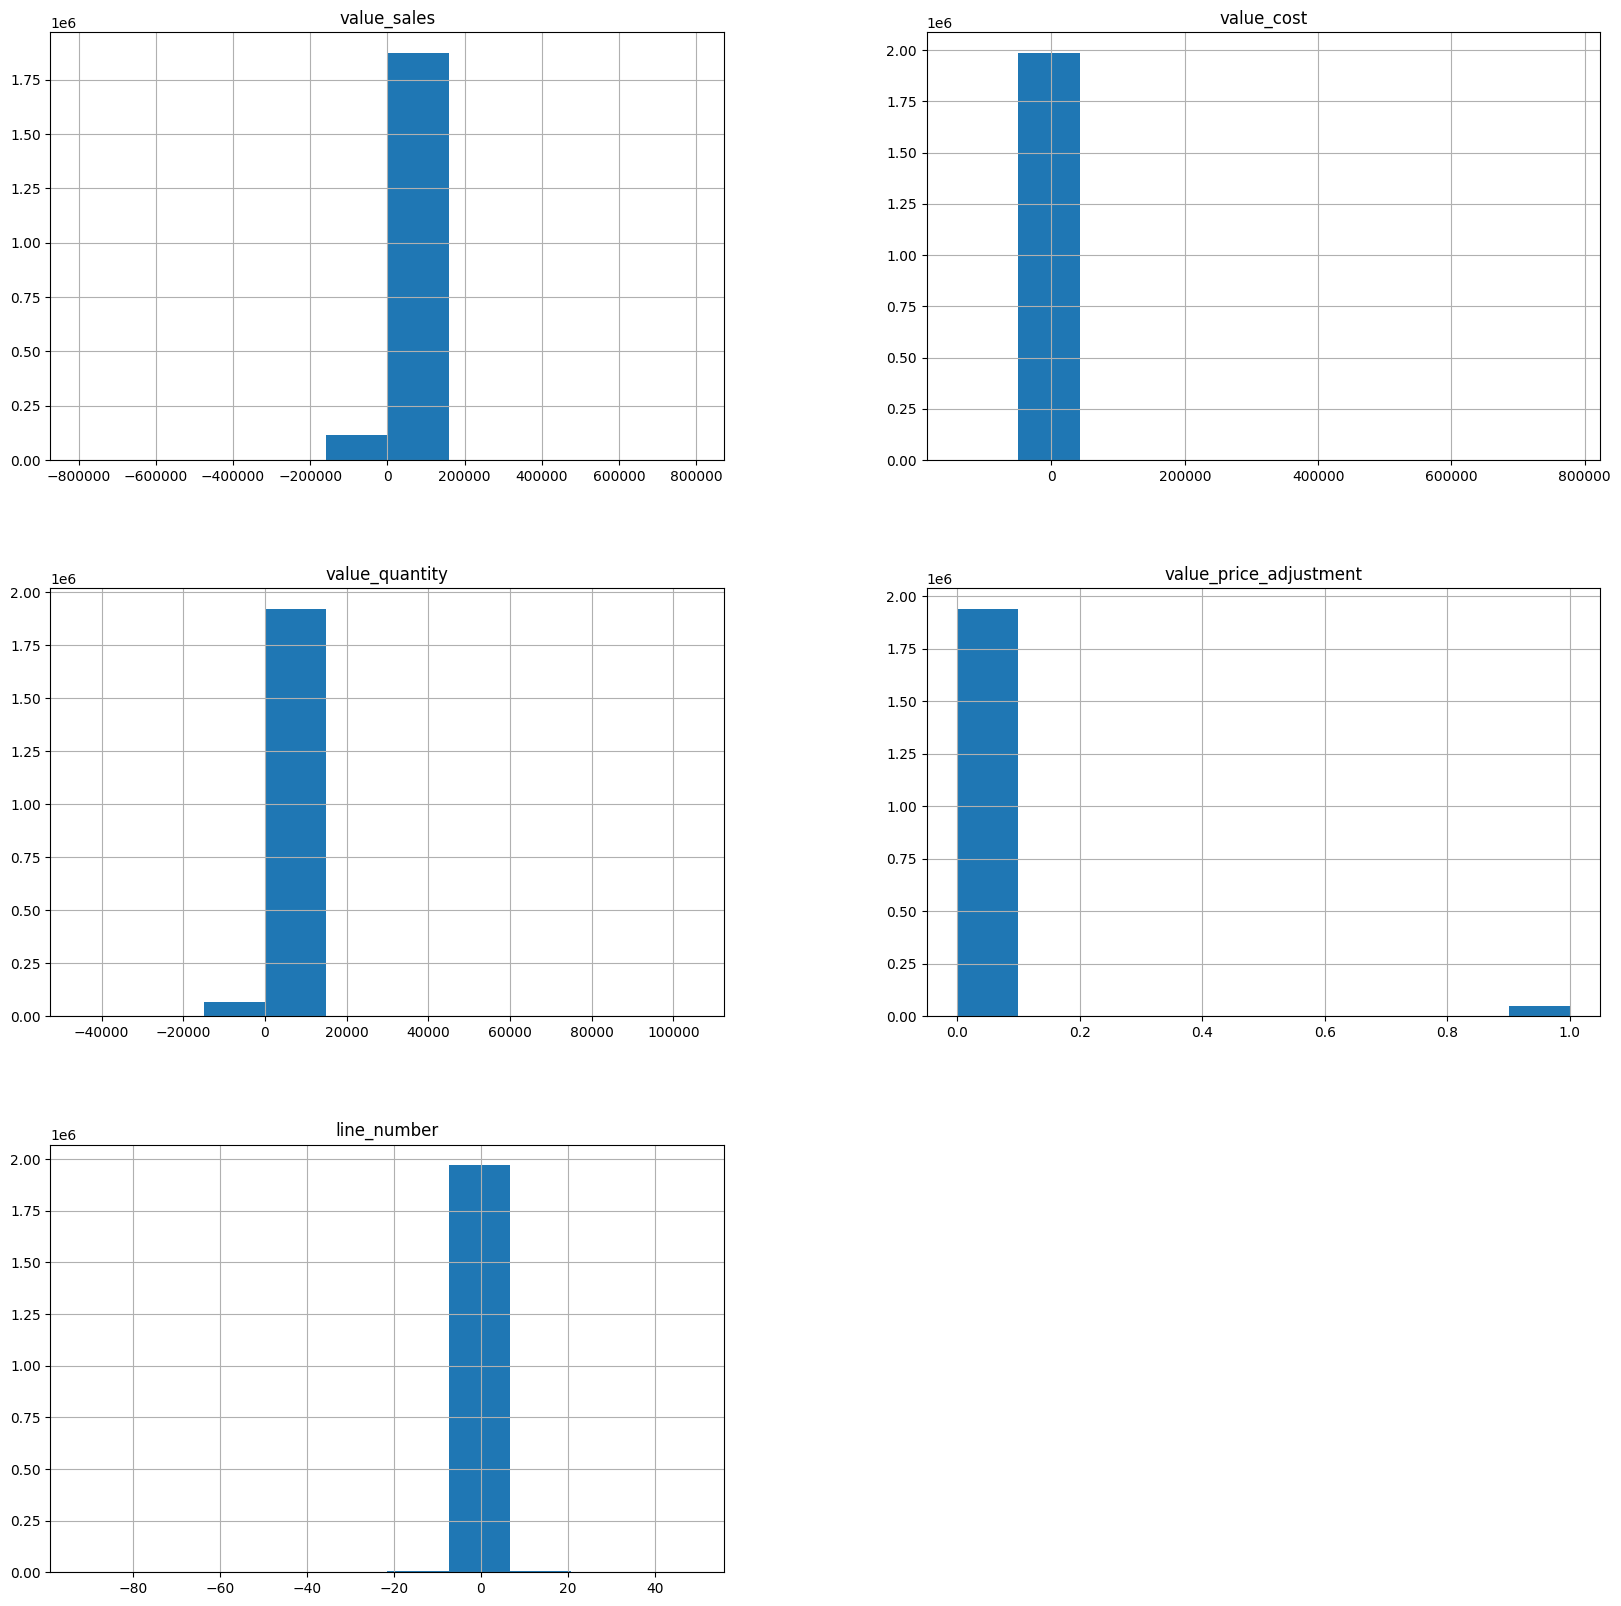

In [23]:
df.hist(figsize=(20, 20), column=df.select_dtypes(exclude=['object', 'datetime']).columns)
plt.show()

In [24]:
#show negative value_sales
negative_sales = df[df['value_sales'] < 0]
print(f"count of negative value_sales: {negative_sales.shape[0]}")
negative_sales[['accounting_date', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment']].head()

count of negative value_sales: 113537


,accounting_date,value_sales,value_cost,value_quantity,value_price_adjustment
61,2012-02-02,-6.38,-4.2428,-2.0,0
115,2012-01-17,-95.70,-63.6420,-30.0,0
176,2012-04-17,-3.28,-1.9300,-1.0,0
182,2012-02-02,-77.56,-59.3992,-28.0,0
220,2012-01-20,-2.90,-1.9300,-1.0,0


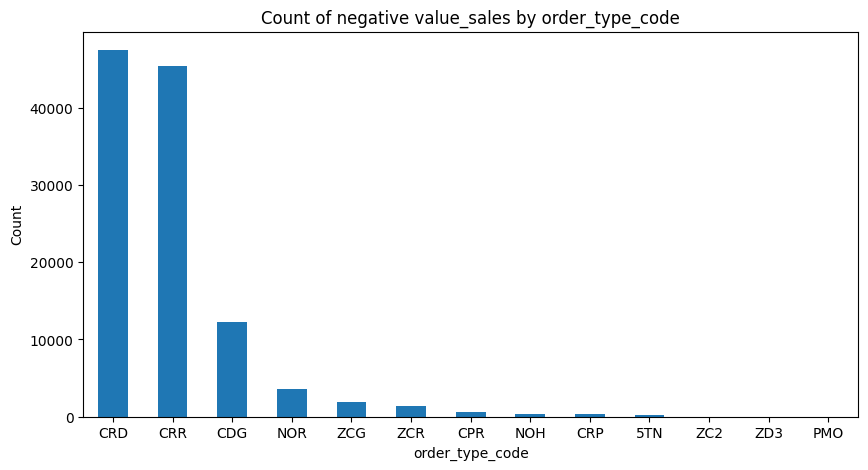

In [25]:
df[df['value_sales'] < 0]['order_type_code'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Count of negative value_sales by order_type_code")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

From this bar chart it show that most negative sales has order_type_code CRD, CRR, CDG, and NOR. The reason why it has negative sales is because some order involve refunds, defect, price adjustment, and cancel order.

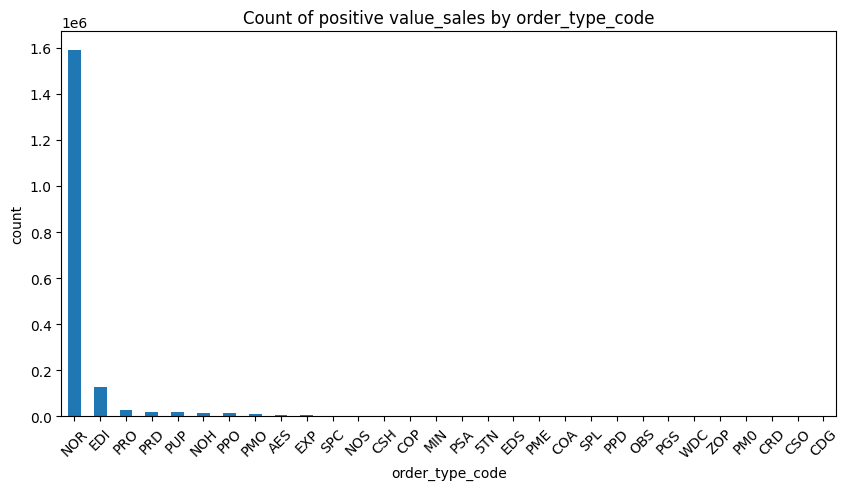

In [26]:
df[df['value_sales'] > 0]['order_type_code'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Count of positive value_sales by order_type_code")
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

Most possitve order are NOR, and EDI, which are normal order, and edi. EDI is Electronic Data Interchange, it is the computer-to-computer exchange of business documents in a standard electronic format between business partners.

In [27]:
#inpect value_price_adjustment greater than 0
price_adjustment0 = df[df['value_price_adjustment'] > 0][['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']]
print(f"count of value_price_adjustment greater than 0: {price_adjustment0.shape[0]}")
price_adjustment0.head()

count of value_price_adjustment greater than 0: 48551


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
630,GENIE18WCDLES,-79.75,0.0,0.0,1,CRD
1000,GENIE14WCDLBC,-70.56,0.0,0.0,1,CRD
1001,GENIE14WCDLBC,-1008.42,0.0,0.0,1,CRD
2376,GIGA2000MH,-68.08,0.0,0.0,1,CRD
2730,GENIE18WWWBC,-3.48,0.0,0.0,1,CRD


In [28]:
price_adjustment0.describe(include='all').round(2)

,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
count,48551,48551.00,48551.0,48551.0,48551.0,48551
unique,5615,NaN,NaN,NaN,NaN,6
top,16868,NaN,NaN,NaN,NaN,CRD
freq,559,NaN,NaN,NaN,NaN,45549
mean,NaN,-171.28,0.0,0.0,1.0,NaN
std,NaN,4725.38,0.0,0.0,0.0,NaN
min,NaN,-793541.98,0.0,0.0,1.0,NaN
25%,NaN,-54.00,0.0,0.0,1.0,NaN
50%,NaN,-20.60,0.0,0.0,1.0,NaN
75%,NaN,-6.12,0.0,0.0,1.0,NaN


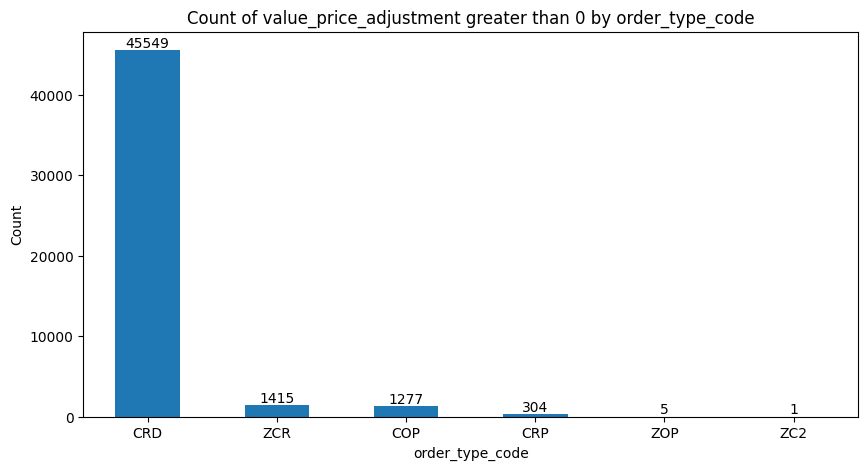

In [29]:
price_adjustment0['order_type_code'].value_counts().plot(kind='bar', figsize=(10, 5))
for i, v in enumerate(price_adjustment0['order_type_code'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title("Count of value_price_adjustment greater than 0 by order_type_code")
plt.ylabel("Count")
plt.xticks(rotation=0);

In [30]:
#inpect value_sales lower than value_cost
value_sales_cost = df[df['value_sales'] < df['value_cost']][['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']]
print(f"count of value_sales lower than value_cost: {value_sales_cost.shape[0]}")
value_sales_cost.head()

count of value_sales lower than value_cost: 148672


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
61,GENIE14WCDLES,-6.38,-4.2428,-2.0,0,CDG
115,GENIE18WCDLES,-95.70,-63.6420,-30.0,0,CDG
176,GENIE11WWWES,-3.28,-1.9300,-1.0,0,CRR
182,GENIE14WCDLBC,-77.56,-59.3992,-28.0,0,CDG
220,GENIE11WCDLES,-2.90,-1.9300,-1.0,0,CRR


In [31]:
value_sales_cost[value_sales_cost['value_sales'] > 0].head()

,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
371,GENIE11WCDLES,25.44,25.4568,12.0,0,CSH
1080,GLB50/E,306.00,1043.4600,102.0,0,EXP
1468,F5124RAA4AX1,2960.00,2967.6160,40.0,0,NOR
1677,GENIE14WWWES,12.72,12.7284,6.0,0,CSH
2020,ALC-A0399MM/CKD,881.44,995.0800,100.0,0,NOR


In [32]:
#inspect value_quantity equal to 0
value_quantity0 = df[df['value_quantity'] == 0][['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']]
print(f"count of value_quantity equal to 0: {value_quantity0.shape[0]}")
value_quantity0.head()

count of value_quantity equal to 0: 48554


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
630,GENIE18WCDLES,-79.75,0.0,0.0,1,CRD
1000,GENIE14WCDLBC,-70.56,0.0,0.0,1,CRD
1001,GENIE14WCDLBC,-1008.42,0.0,0.0,1,CRD
2376,GIGA2000MH,-68.08,0.0,0.0,1,CRD
2730,GENIE18WWWBC,-3.48,0.0,0.0,1,CRD


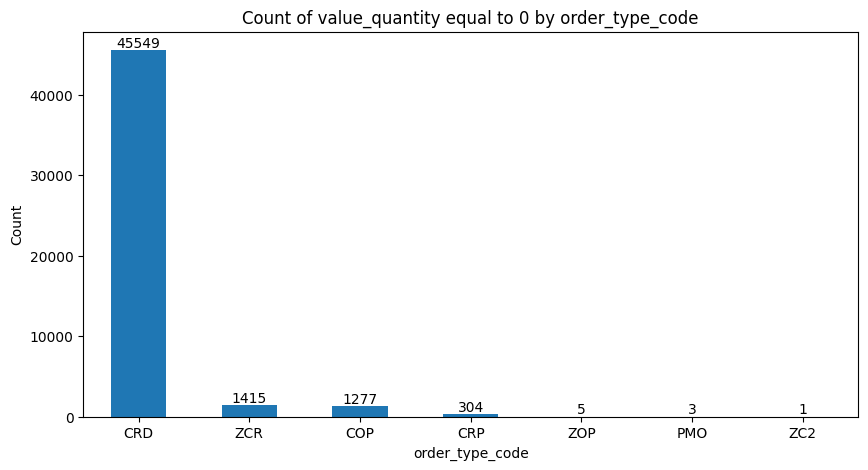

In [33]:
value_quantity0['order_type_code'].value_counts().plot(kind='bar', figsize=(10, 5))
for i, v in enumerate(value_quantity0['order_type_code'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title("Count of value_quantity equal to 0 by order_type_code")
plt.ylabel("Count")
plt.xticks(rotation=0);


In [34]:
#inspect CDG order_type_code
cdg = df[df['order_type_code'] == 'CDG'][['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']]
print(f"count of CDG order_type_code: {cdg.shape[0]}")
cdg.head()


count of CDG order_type_code: 12283


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
61,GENIE14WCDLES,-6.38,-4.2428,-2.0,0,CDG
115,GENIE18WCDLES,-95.70,-63.6420,-30.0,0,CDG
182,GENIE14WCDLBC,-77.56,-59.3992,-28.0,0,CDG
312,GENIE8WWWES,-3.28,-2.1214,-1.0,0,CDG
351,GENIE11WWWES,-3.28,-2.1214,-1.0,0,CDG


In [35]:
cdg.describe(include='all').round(2)

,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
count,12283,12283.00,12283.00,12283.00,12283.0,12283
unique,1704,NaN,NaN,NaN,NaN,1
top,PND236EL,NaN,NaN,NaN,NaN,CDG
freq,746,NaN,NaN,NaN,NaN,12283
mean,NaN,-38.68,-23.76,-1.87,0.0,NaN
std,NaN,86.19,49.72,4.05,0.0,NaN
min,NaN,-7665.00,-4183.83,-140.00,0.0,NaN
25%,NaN,-48.10,-29.90,-2.00,0.0,NaN
50%,NaN,-28.13,-16.74,-1.00,0.0,NaN
75%,NaN,-10.72,-6.90,-1.00,0.0,NaN


In [36]:
df['bonus_group_code'].value_counts(dropna=False)

bonus_group_code
Trade           1652568
Professional     335814
Name: count, dtype: int64

In [37]:
#inspect sales geater than 0
sales0 = df[df['value_sales'] > 0][['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']]
print(f"count of sales greater than 0: {sales0.shape[0]}")
sales0.head()

count of sales greater than 0: 1852545


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
0,GENIE8WWWBC,218.40,178.1976,84.0,0,NOR
1,GENIE8WWWBC,38.28,25.4568,12.0,0,NOR
2,GENIE8WWWBC,40.20,25.4568,12.0,0,NOR
3,GENIE8WWWBC,20.10,12.7284,6.0,0,EDI
4,GENIE8WWWBC,19.14,12.7284,6.0,0,EDI


## 4. Explore Relationships and Correlations
- Pairwise Plots: Use scatterplot matrices or pair plots to understand relationships between numerical variables.
- Correlation Matrix: Generate a heatmap for correlations between numerical variables, helping identify multicollinearity or highly correlated variables.

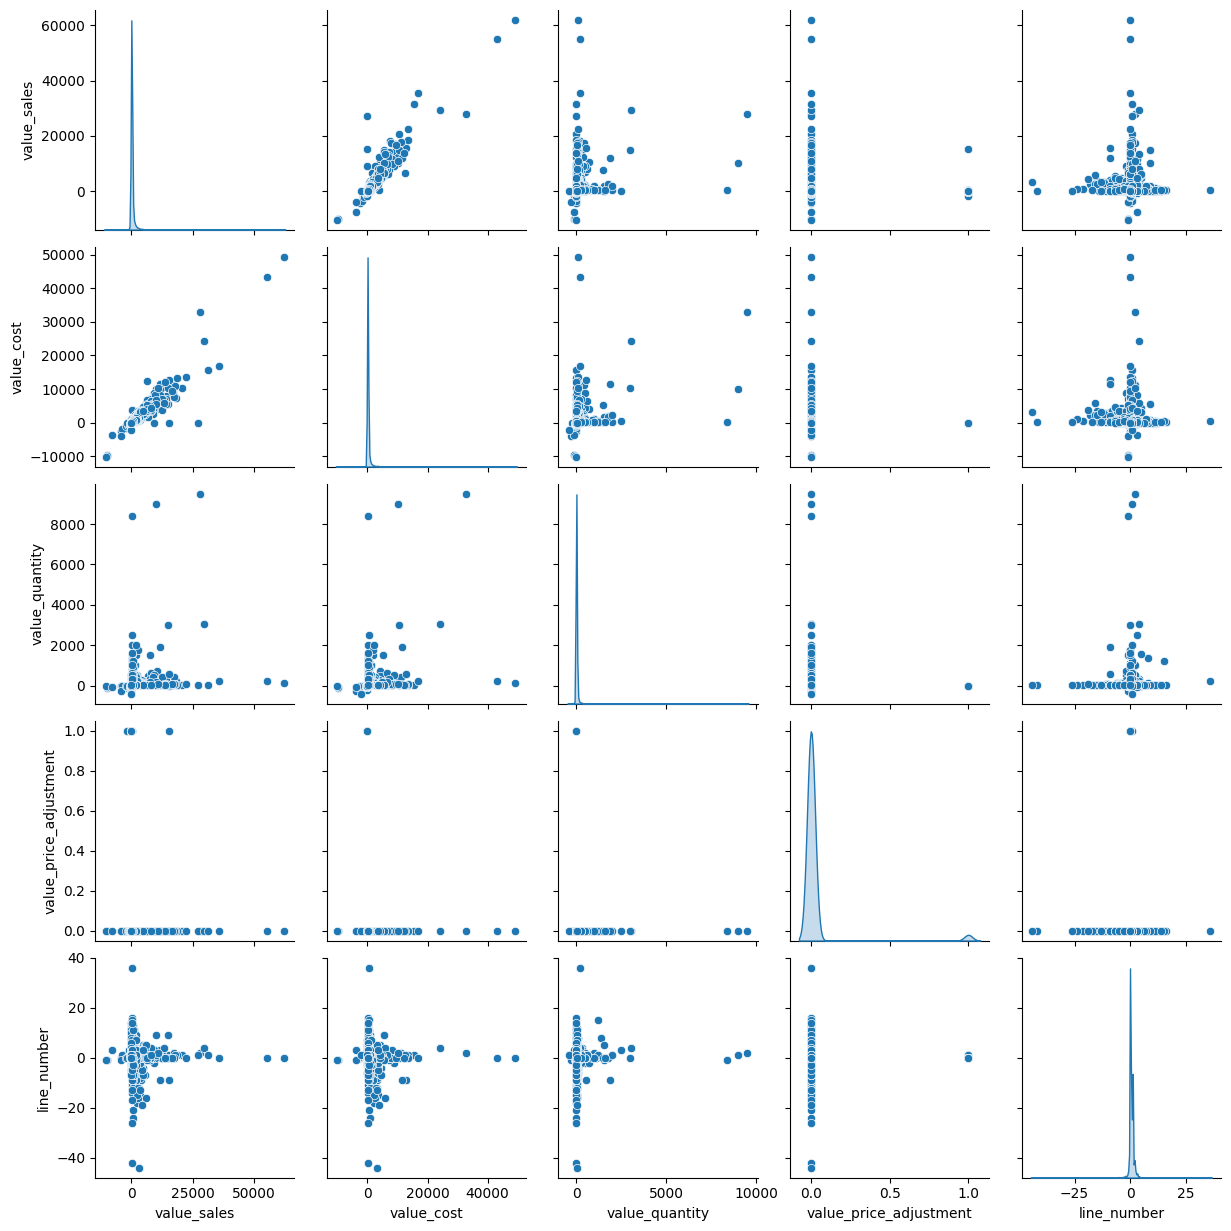

In [41]:
sns.pairplot(data=df.select_dtypes(exclude=['object', 'datetime']).sample(10000), diag_kind='kde')

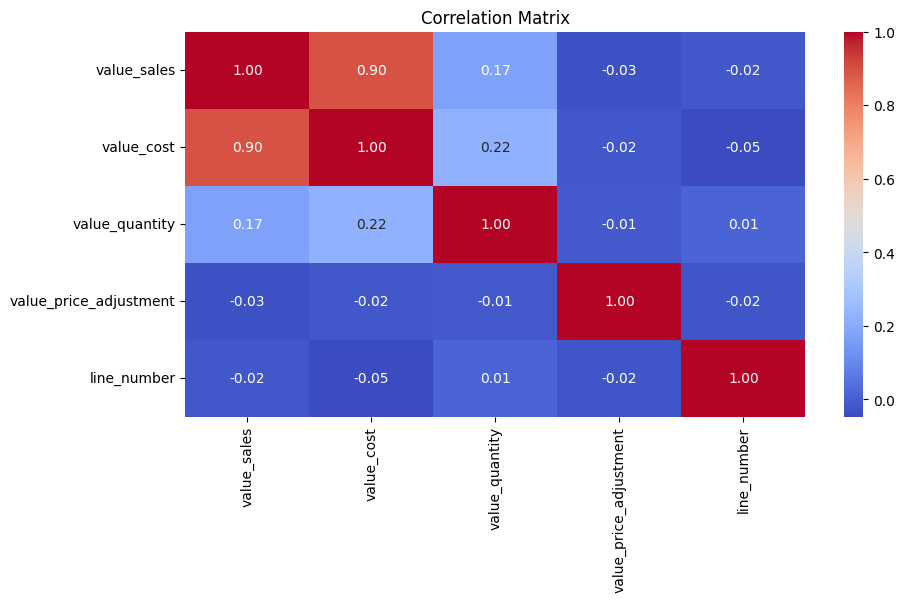

In [51]:
corr = df.select_dtypes(exclude=['object', 'datetime']).corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

## 5. Univariate Analysis
- Numerical Variables: Histograms, density plots, or boxplots help assess distribution.
- Categorical Variables: Bar plots or pie charts to show frequency distribution.

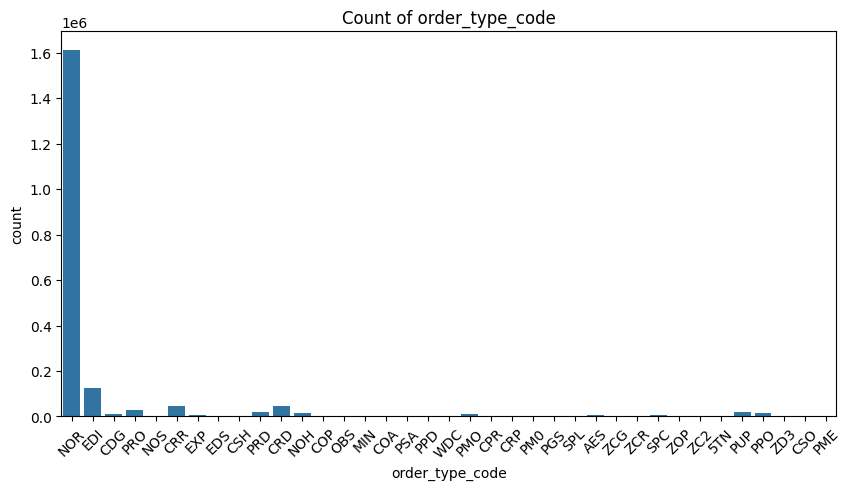

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='order_type_code')
plt.title('Count of order_type_code')
plt.xticks(rotation=45)
plt.show()

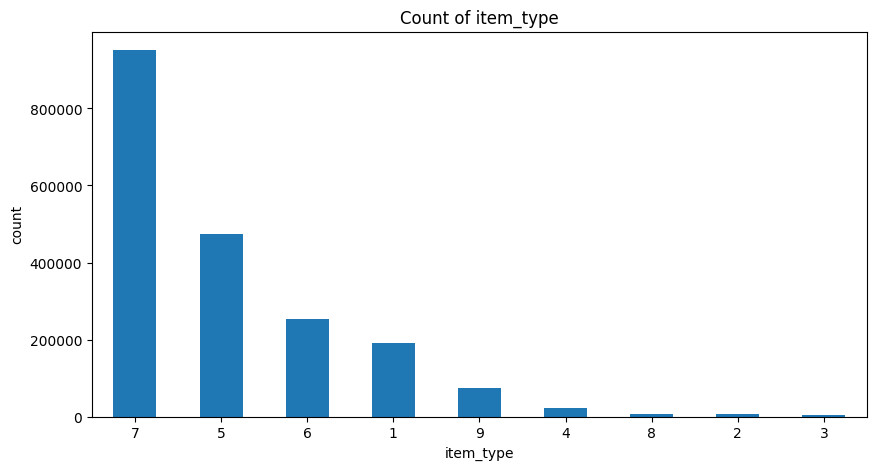

In [55]:
df['item_type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Count of item_type')
plt.ylabel('count')
plt.xticks(rotation=0);

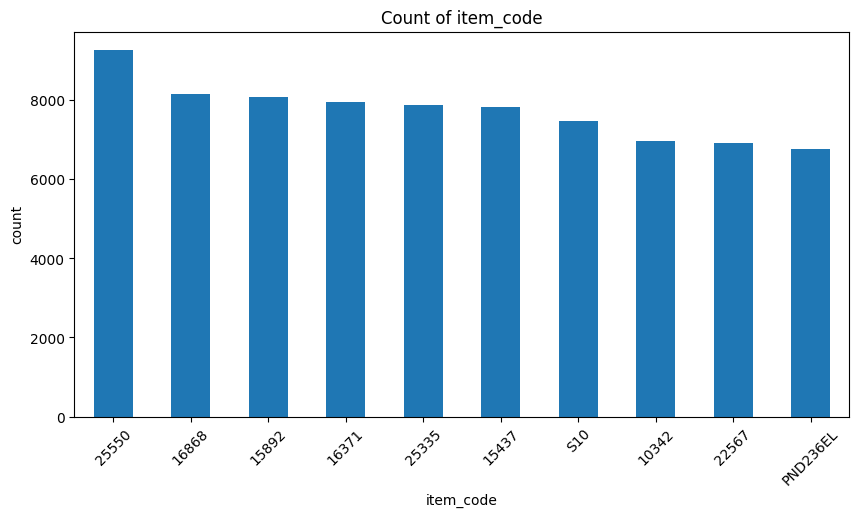

In [56]:
df['item_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of item_code')
plt.ylabel('count')
plt.xticks(rotation=45);

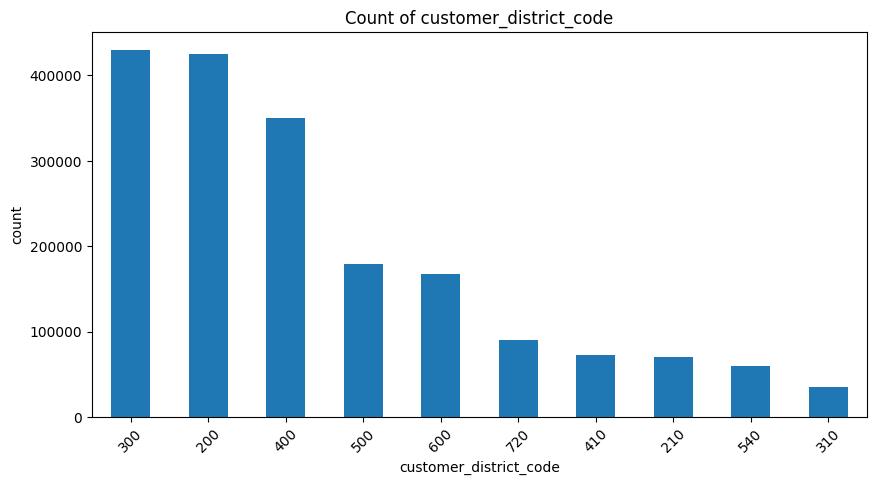

In [57]:
df['customer_district_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of customer_district_code')
plt.ylabel('count')
plt.xticks(rotation=45);

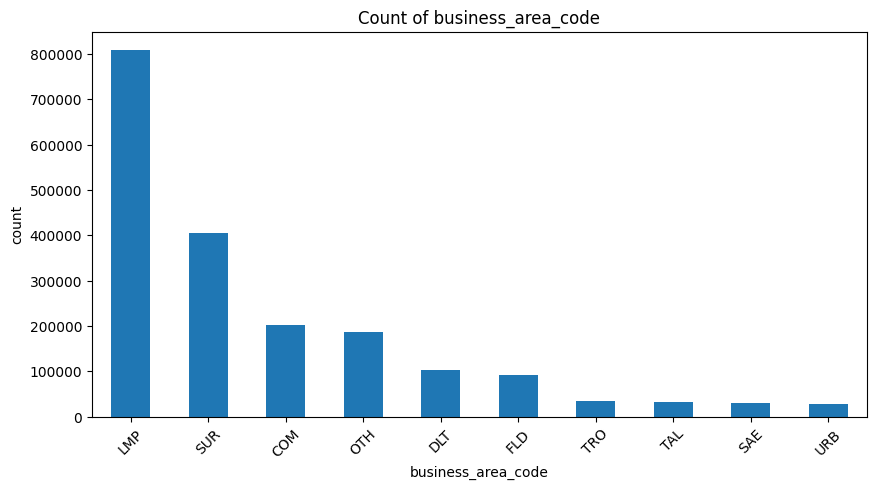

In [58]:
df['business_area_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of business_area_code')
plt.ylabel('count')
plt.xticks(rotation=45);

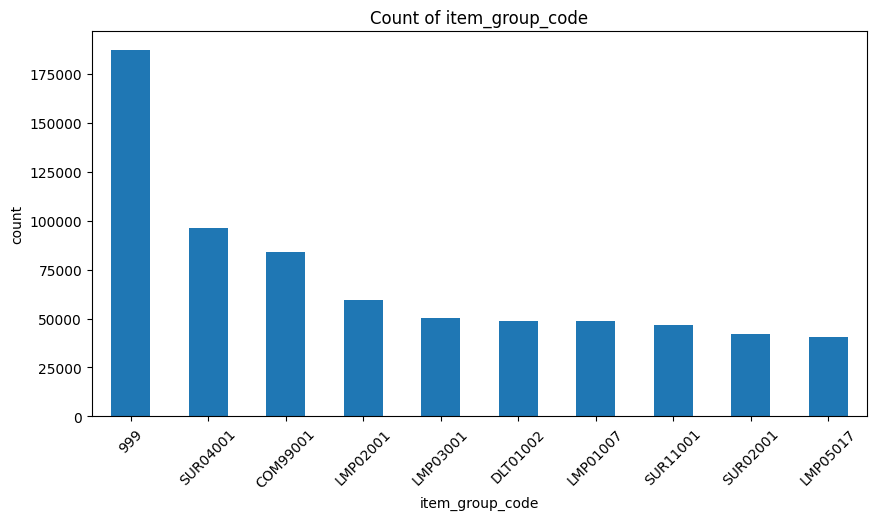

In [59]:
df['item_group_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of item_group_code')
plt.ylabel('count')
plt.xticks(rotation=45);

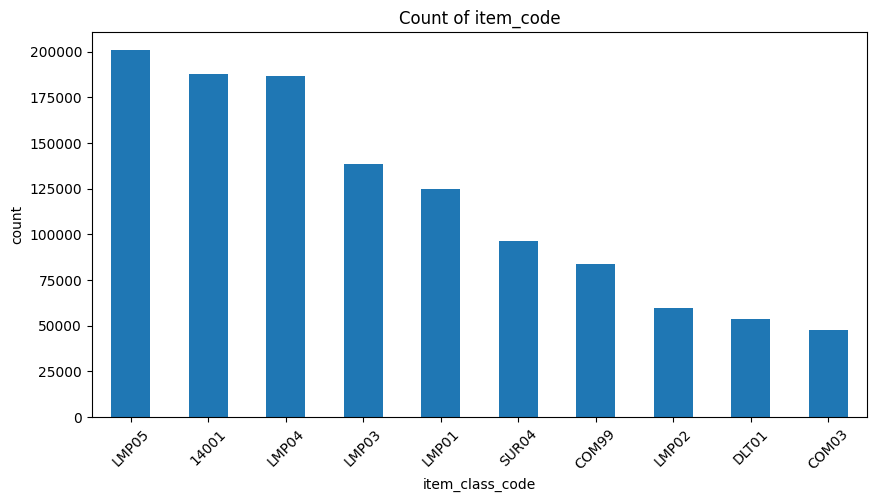

In [60]:
df['item_class_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of item_code')
plt.ylabel('count')
plt.xticks(rotation=45);

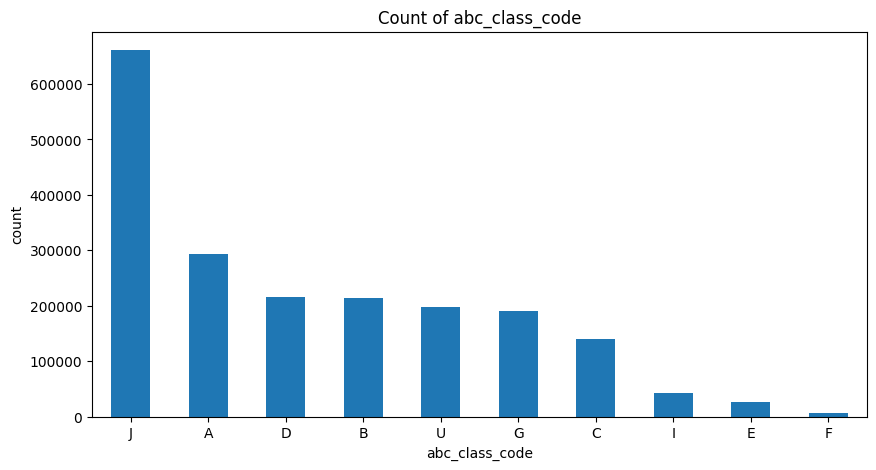

In [61]:
df['abc_class_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of abc_class_code')
plt.ylabel('count')
plt.xticks(rotation=0);

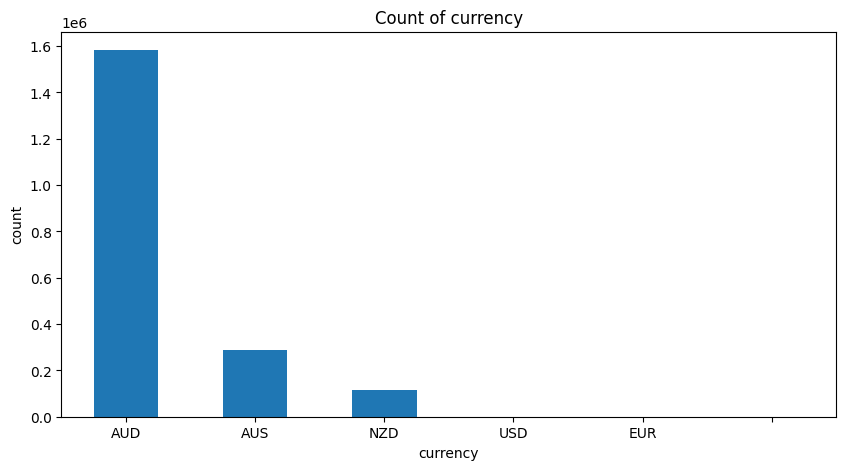

In [62]:
df['currency'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of currency')
plt.ylabel('count')
plt.xticks(rotation=0);

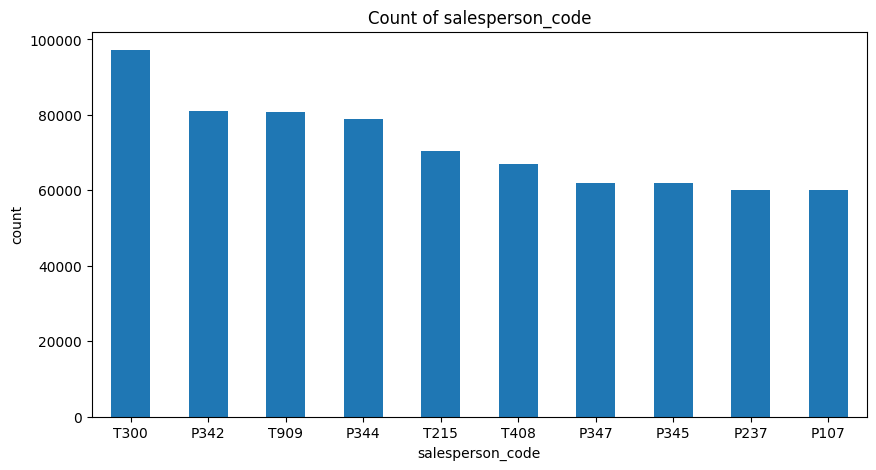

In [63]:
df['salesperson_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of salesperson_code')
plt.ylabel('count')
plt.xticks(rotation=0);

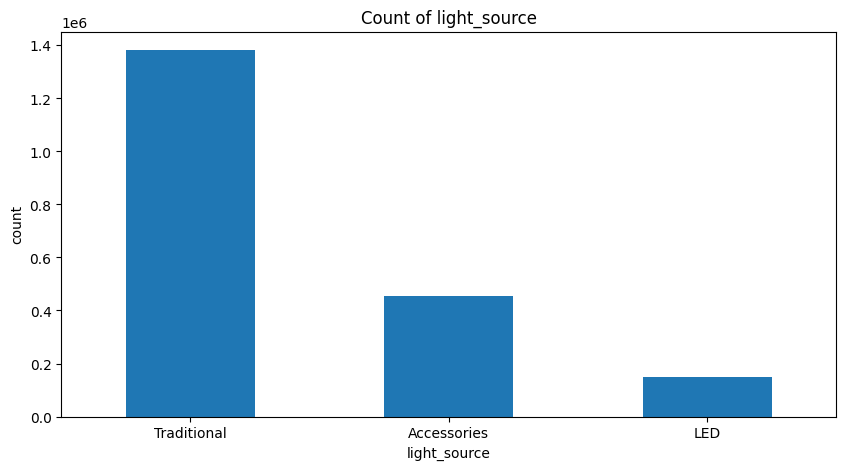

In [64]:
df['light_source'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of light_source')
plt.ylabel('count')
plt.xticks(rotation=0);

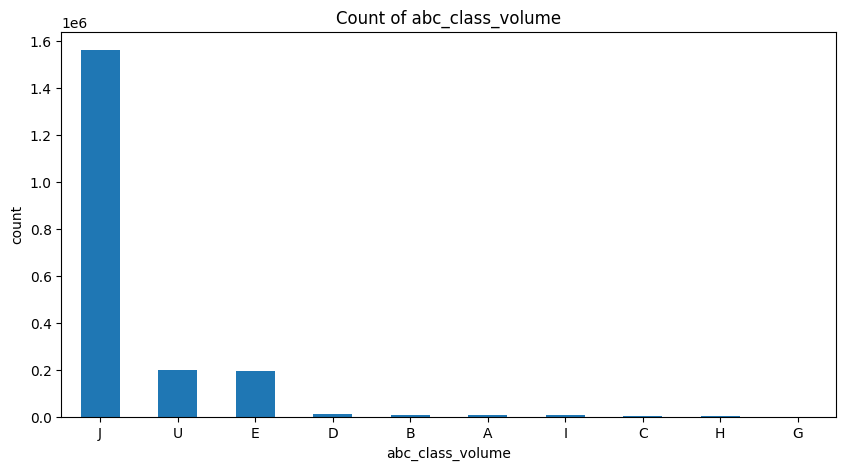

In [65]:
df['abc_class_volume'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of abc_class_volume')
plt.ylabel('count')
plt.xticks(rotation=0);

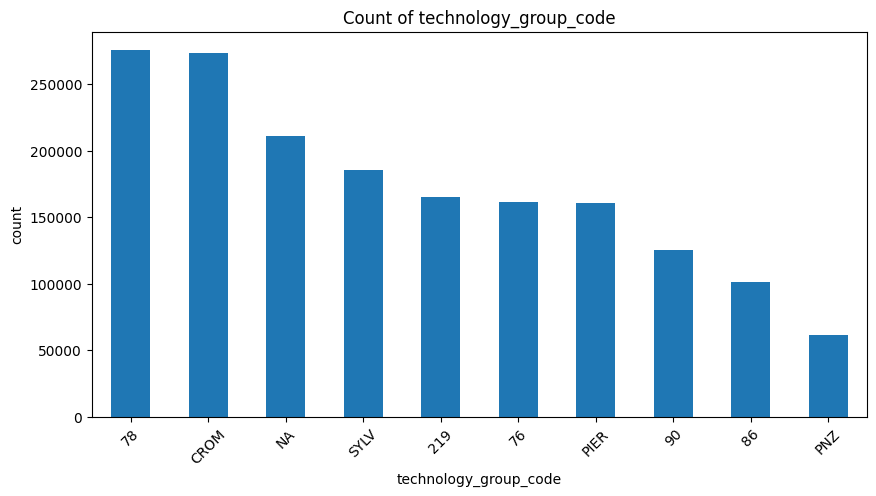

In [66]:
df['technology_group_code'].value_counts()[:10].plot(kind='bar', figsize=(10, 5))
plt.title('Count of technology_group_code')
plt.ylabel('count')
plt.xticks(rotation=45);

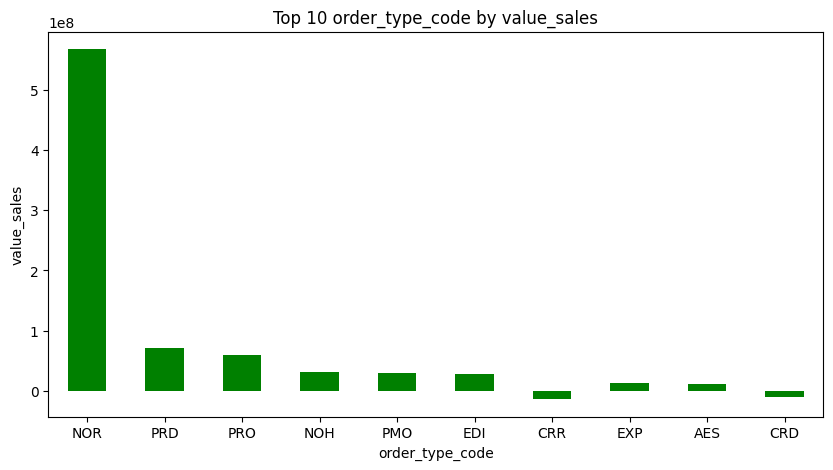

In [67]:
df.groupby('order_type_code')['value_sales'].sum().sort_values(ascending=False,key=abs)[:10].plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Top 10 order_type_code by value_sales')
plt.ylabel('value_sales')
plt.xticks(rotation=0);


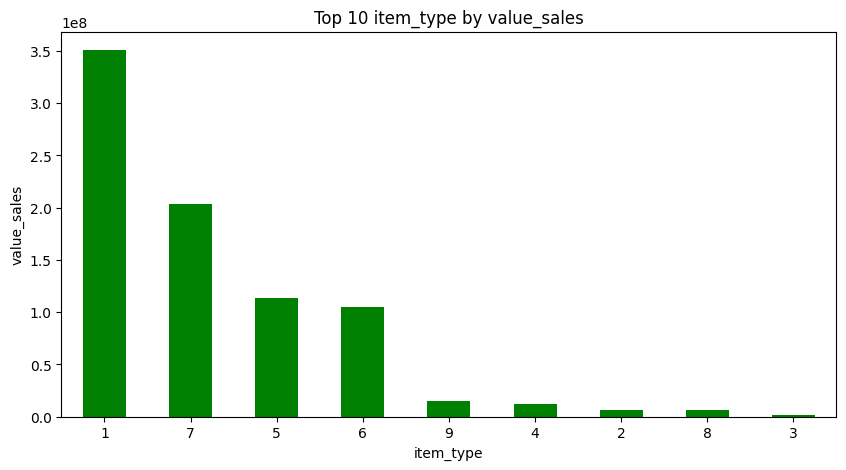

In [68]:
df.groupby('item_type')['value_sales'].sum().sort_values(ascending=False,key=abs)[:10].plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Top 10 item_type by value_sales')
plt.ylabel('value_sales')
plt.xticks(rotation=0);


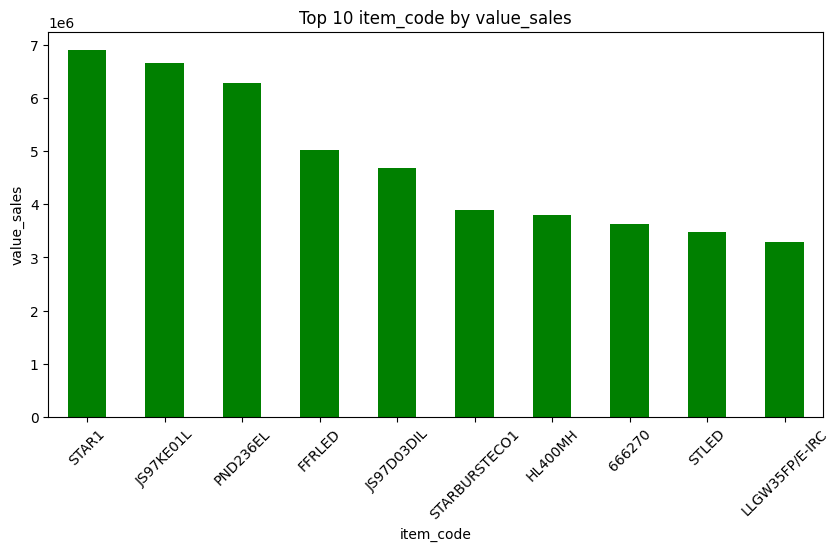

In [69]:
df.groupby('item_code')['value_sales'].sum().sort_values(ascending=False,key=abs)[:10].plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Top 10 item_code by value_sales')
plt.ylabel('value_sales')
plt.xticks(rotation=45);


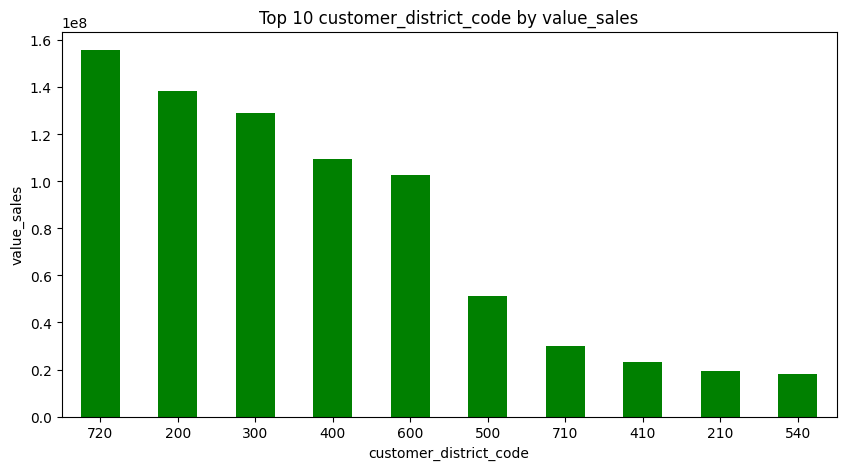

In [70]:
df.groupby('customer_district_code')['value_sales'].sum().sort_values(ascending=False,key=abs)[:10].plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Top 10 customer_district_code by value_sales')
plt.ylabel('value_sales')
plt.xticks(rotation=0);

## 6. Bivariate Analysis
- Numerical vs. Numerical: Scatter plots or line plots for time series.
- Numerical vs. Categorical: Boxplots or violin plots to see distributions across categories.
- Categorical vs. Categorical: Cross-tabulations or stacked bar plots to understand relationships.


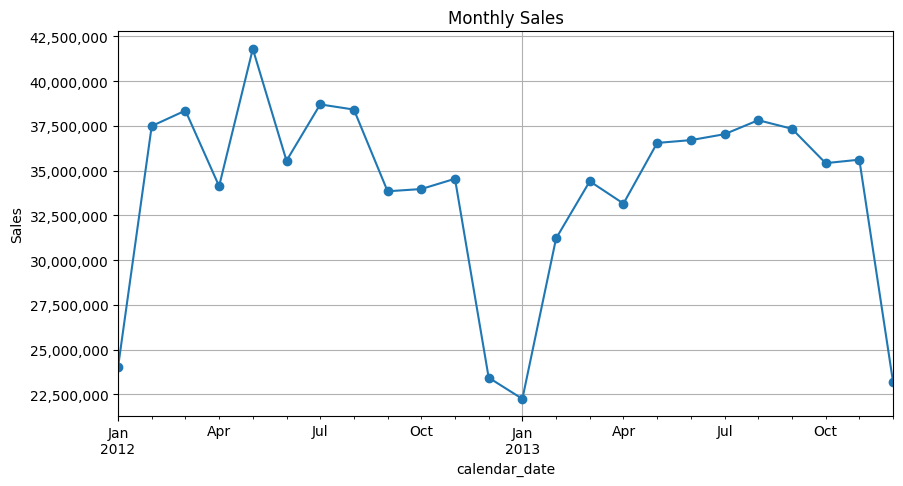

In [46]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('M'))['value_sales'].sum().plot(marker='o', figsize=(10, 5))

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales')
plt.ylabel('Sales')
plt.grid()
plt.show()

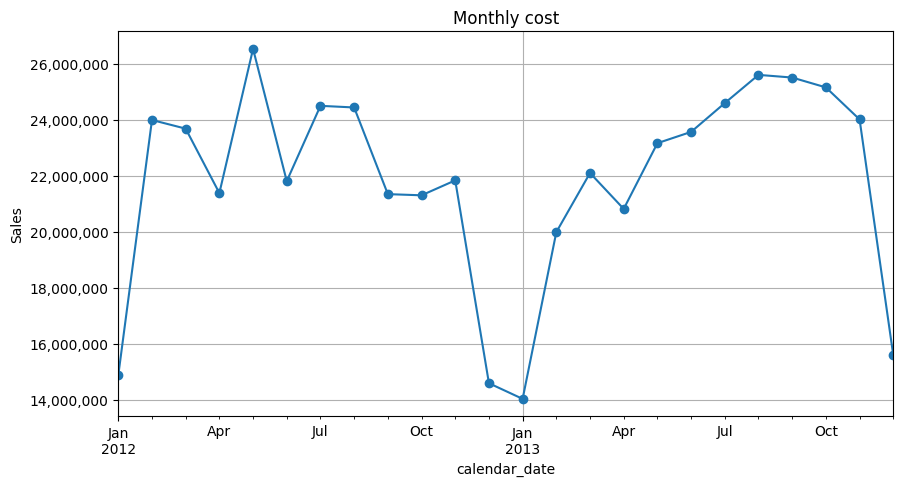

In [47]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('M'))['value_cost'].sum().plot(marker='o', figsize=(10, 5))

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly cost')
plt.ylabel('cost')
plt.grid()
plt.show()

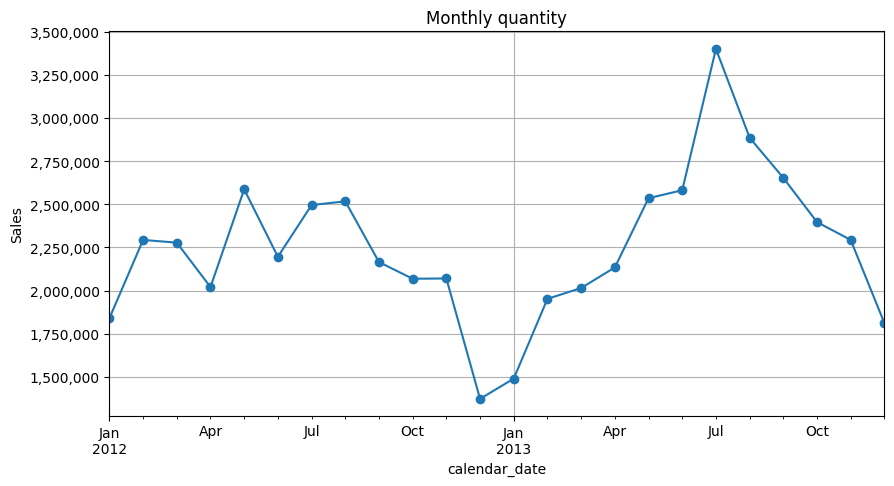

In [48]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('M'))['value_quantity'].sum().plot(marker='o', figsize=(10, 5))

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly quantity')
plt.ylabel('quantity')
plt.grid()
plt.show()

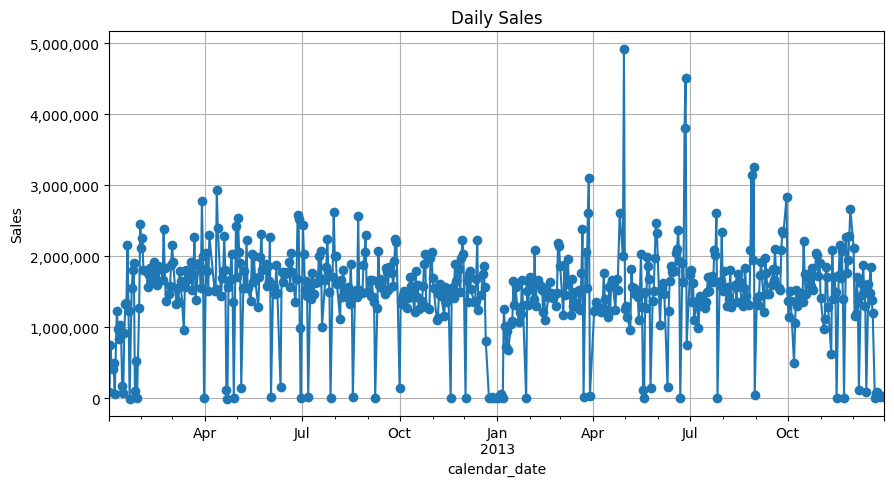

In [52]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('D'))['value_sales'].sum().plot(marker='o', figsize=(10, 5))

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Daily Sales')
plt.ylabel('Sales')
plt.grid()
plt.show()

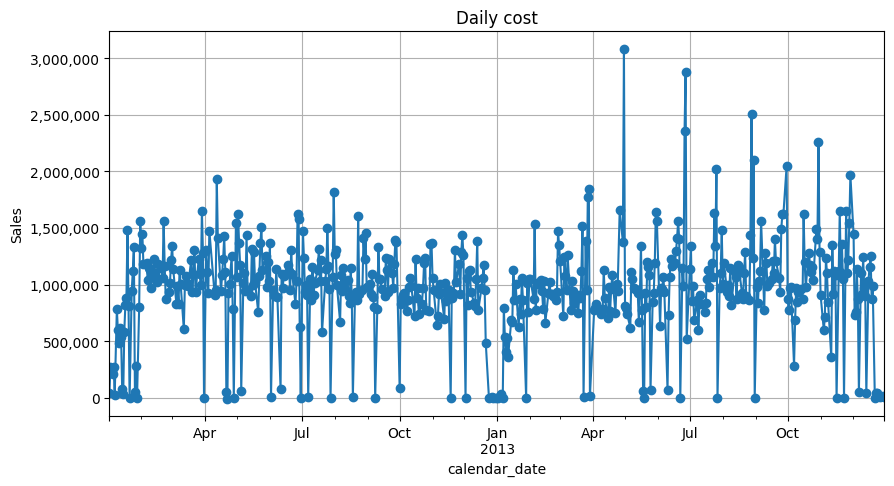

In [53]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('D'))['value_cost'].sum().plot(marker='o', figsize=(10, 5))

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Daily cost')
plt.ylabel('cost')
plt.grid()
plt.show()

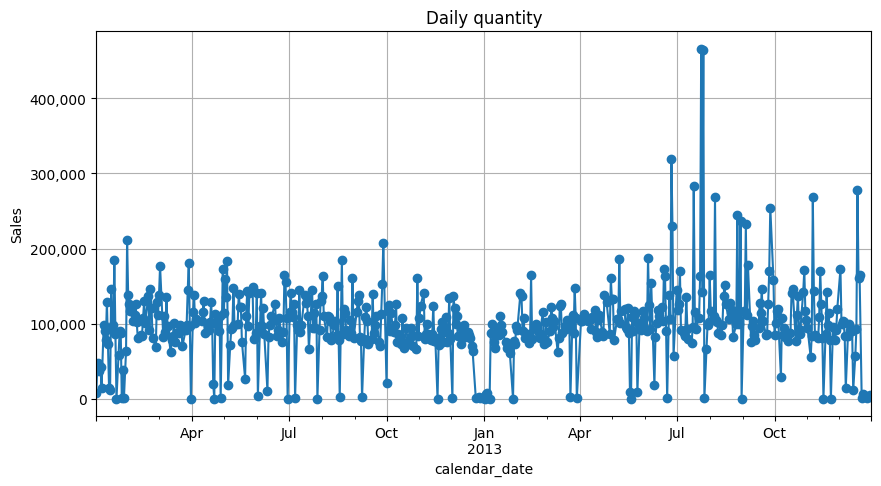

In [54]:
# Assuming df is already defined and contains the necessary data
df.groupby(df['calendar_date'].dt.to_period('D'))['value_quantity'].sum().plot(marker='o', figsize=(10, 5))

# Format y-axis
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Daily quantity')
plt.ylabel('Quantity')
plt.grid()
plt.show()

## 7. Feature Engineering and Initial Hypotheses
- Create any initial features or transformations you suspect may be useful.
- Formulate hypotheses on relationships or trends that you aim to test in later stages.

In [56]:
test = df.dropna()
test['Profit'] = test['value_sales'] - test['value_cost']
test['Profit_margin'] = test['Profit'] / test['value_sales']
test['unit_price'] = test['value_sales'] / test['value_quantity']
print(f"count of missing values: {test.shape[0]}")
test = test[test['value_sales'] != 0]
test = test[test['Profit'] != 0]
test = test[test['value_cost'] != 0]
test = test[test['Profit_margin'] > 0]
print(f"count of value_sales not equal to 0: {test.shape[0]}")

C:\Users\exp55\AppData\Local\Temp\ipykernel_18392\3126275665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Profit'] = test['value_sales'] - test['value_cost']
C:\Users\exp55\AppData\Local\Temp\ipykernel_18392\3126275665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Profit_margin'] = test['Profit'] / test['value_sales']
C:\Users\exp55\AppData\Local\Temp\ipykernel_18392\3126275665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

count of missing values: 951177
count of value_sales not equal to 0: 906228


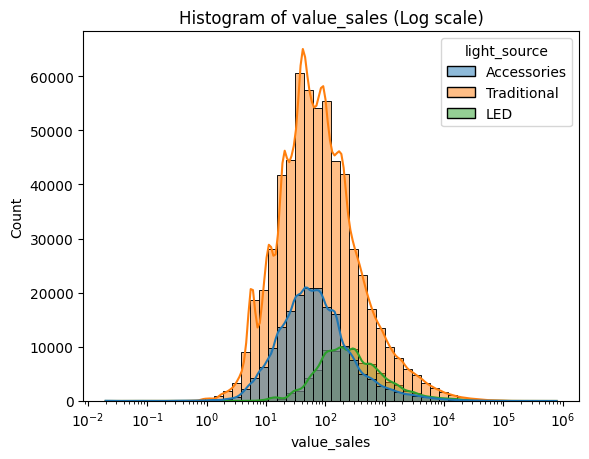

In [57]:
sns.histplot(data=test, x='value_sales', bins=50, kde=True,log_scale=True, hue='light_source')
plt.title("Histogram of value_sales (Log scale)")
plt.show()

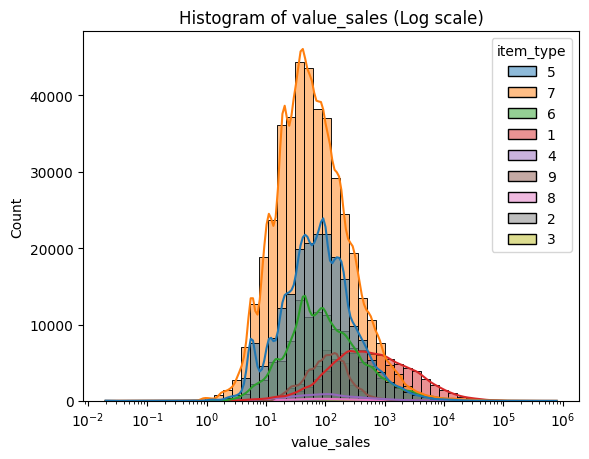

In [58]:
sns.histplot(data=test, x='value_sales', bins=50, kde=True,log_scale=True, hue='item_type')
plt.title("Histogram of value_sales (Log scale)")
plt.show()

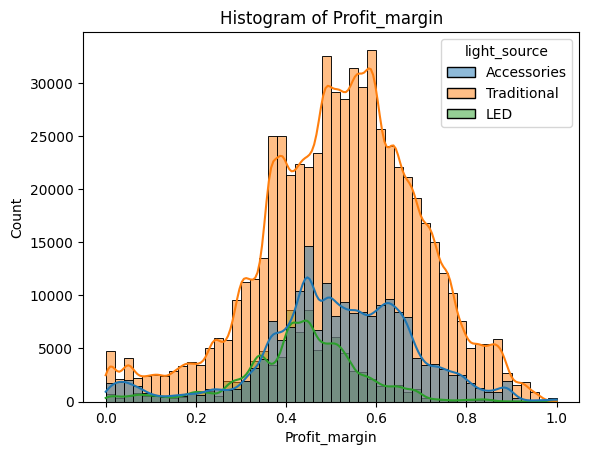

In [59]:
sns.histplot(data=test, x='Profit_margin', bins=50, kde=True,log_scale=False, hue='light_source')
plt.title("Histogram of Profit_margin")
plt.show()

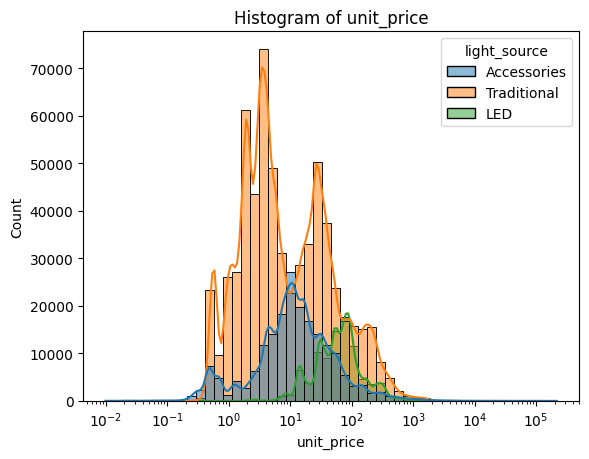

In [60]:
sns.histplot(data=test, x='unit_price', bins=50, kde=True,log_scale=True, hue='light_source')
plt.title("Histogram of unit_price")
plt.show()

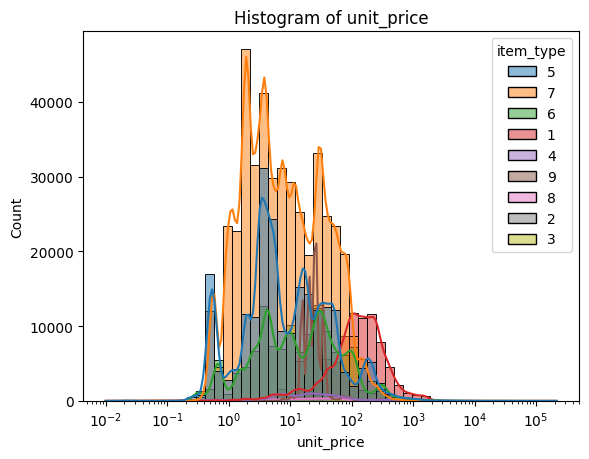

In [61]:
sns.histplot(data=test, x='unit_price', bins=50, kde=True,log_scale=True, hue='item_type')
plt.title("Histogram of unit_price")
plt.show()

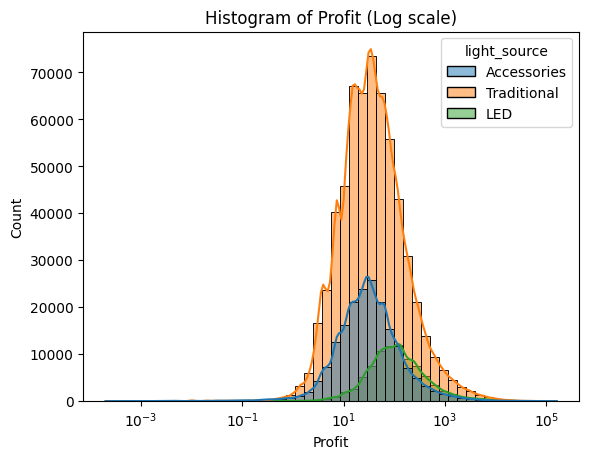

In [62]:
sns.histplot(data=test, x='Profit', bins=50, kde=True,log_scale=True, hue='light_source')
plt.title("Histogram of Profit (Log scale)")
plt.show()

<Axes: xlabel='Profit_margin', ylabel='light_source'>

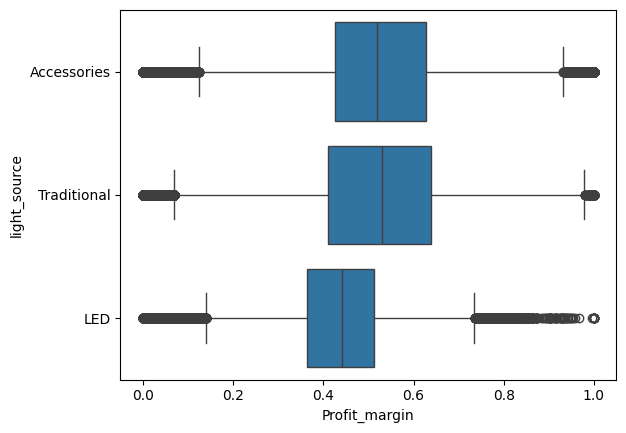

In [63]:
sns.boxplot(data=test, x='Profit_margin', y='light_source')

<Axes: xlabel='Profit_margin', ylabel='item_type'>

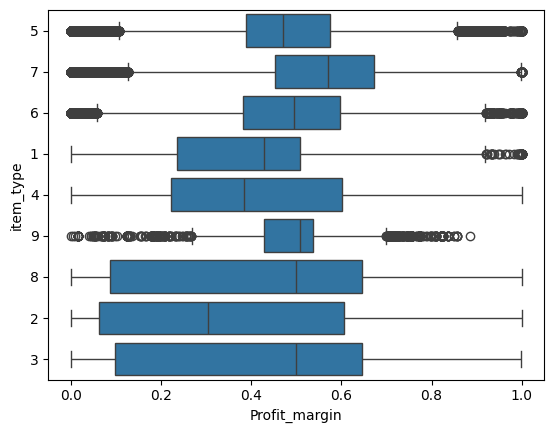

In [64]:
sns.boxplot(data=test, x='Profit_margin', y='item_type')

<Axes: xlabel='unit_price', ylabel='light_source'>

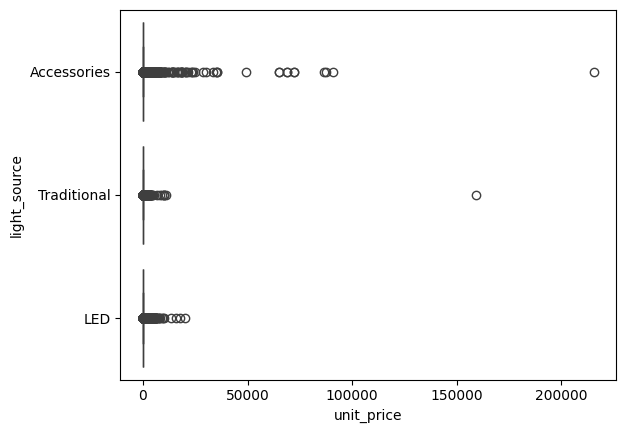

In [66]:
sns.boxplot(data=test, x='unit_price', y='light_source')

<Axes: xlabel='unit_price', ylabel='item_type'>

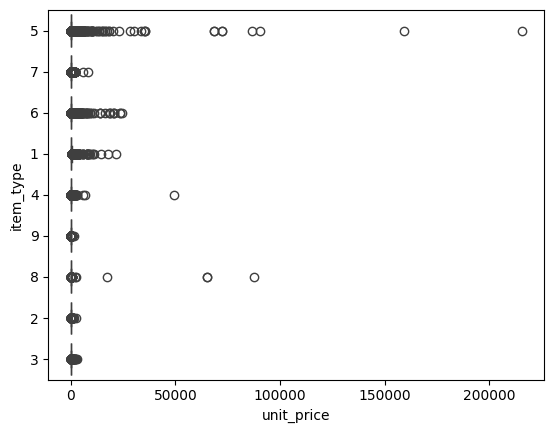

In [67]:
sns.boxplot(data=test, x='unit_price', y='item_type')

<Axes: xlabel='Profit', ylabel='light_source'>

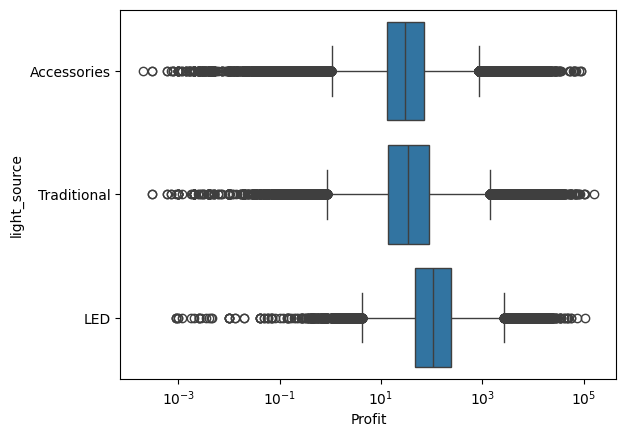

In [69]:
sns.boxplot(data=test, x='Profit', y='light_source', log_scale=True)

## 8. Document Findings
- Note interesting observations, such as trends, anomalies, or patterns.
- Save key plots or summary tables that highlight important findings.